<br>
<font>
<!-- <img src="https://sina.sharif.edu/~m_salehi/images/logo_sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://sina.sharif.edu/~m_salehi/images/logo_sharif.png" width=160 height=180>
<br>
<font color=0F5298 size=6>
Introduction to Machine Learning <br>
<font color= 6C3BAA size=6>
Linear Classification <br>
<font color=696880 size=5>
<!-- <br> -->
Computer Engineering Department
<br>
Sharif University of Technology

<font color=696880 size=5>
<br>
CE 40477 - Fall 2025

<font color=GREEN size=5>
<br>
Mahdi Aghaei & Farzan Rahmani
<!-- <br> -->

____


# Table of Contents


*   ## [Example: Linear Regression fails in Linear Classification](#scrollTo=4yJjsFY8WHg2)
*   ## [Linearly Separable and Non-linearly Separable Data](#scrollTo=O4TzTi2JkYZs&line=1&uniqifier=1)
    *   ### [Linearly Separable Data](#scrollTo=NRAV7FDF9b92&line=1&uniqifier=1)
    *  ### [Non-Linearly Separable Data (XOR Problem)](#scrollTo=_-jBpjjo_0tz)
    * ### [Non-Linearly Separable Data (Circular data points)](#scrollTo=v8xUV1aXflch&line=1&uniqifier=1)

*  ## [Perceptron Classifier from scratch](#scrollTo=dl7K_EQrakrj&line=1&uniqifier=1)
*  ## [Imbalanced Data](#scrollTo=_cFA0yEGqluU&line=1&uniqifier=1)
    *   ### [Oversampling(SMOTE)](#scrollTo=oV5KIwGN1xFE&line=1&uniqifier=1)
    *  ### [Undersampling](#scrollTo=3oDp8ldz17RP&line=1&uniqifier=1)
*   ## [Real-World Example: Breast Cancer](#scrollTo=SaNNKHinmSxQ&line=1&uniqifier=1)

# Example: Linear Regression fails in Linear Classification

In this section, we would like to visualize why using techniques of linear regression (using SSE cost function) fails in linear classification:

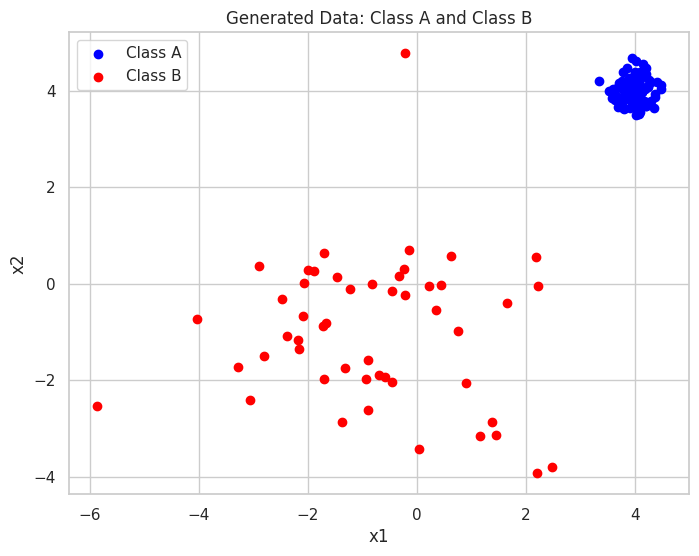

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 samples for Class A from a Gaussian distribution centered at (4, 4) with low variance
class_A = np.random.normal(loc=(4, 4), scale=0.25, size=(100, 2))
labels_A = np.ones(class_A.shape[0])  # Label for Class A is 1

# Generate 50 samples for Class B from a Gaussian distribution centered at (-1, -1) with higher variance
class_B = np.random.normal(loc=(-1, -1), scale=1.5, size=(50, 2))
labels_B = np.zeros(class_B.shape[0])  # Label for Class B is 0

# Combine features and labels of both classes
X = np.vstack((class_A, class_B))  # Combine data
y = np.hstack((labels_A, labels_B))  # Combine labels

# Plot the generated data points
plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

As you can see, the data points are linearly separable in many ways. Now let's fit a line to them:

Model weights: w1 = 0.08, w2 = 0.11, bias = 0.22


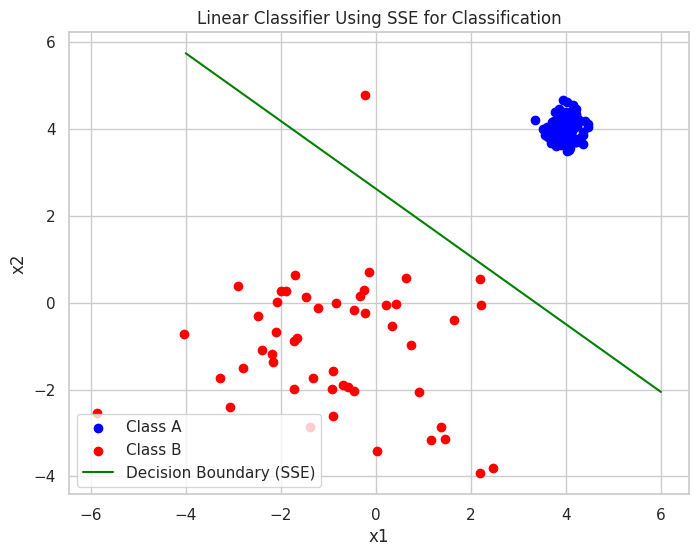

In [146]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model to classify the data
model = LinearRegression()
model.fit(X, y)

# Get model parameters: weights (w1, w2) and bias (w0)
w1, w2 = model.coef_
w0 = model.intercept_

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f}")

# Calculate decision boundary: set model output to 0.5 and solve for x2
x_vals = np.linspace(-4, 6, 100)
decision_boundary = (-w1 * x_vals - w0 + 0.5) / w2

# Plot the data and the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Even the best fitted line fails to classify points. **Can you explain why ?**

# Linearly Separable and Non-linearly Separable Data

In this section, we would visualize linearly separable and non-linearly separable data.

## Linearly Separable Data


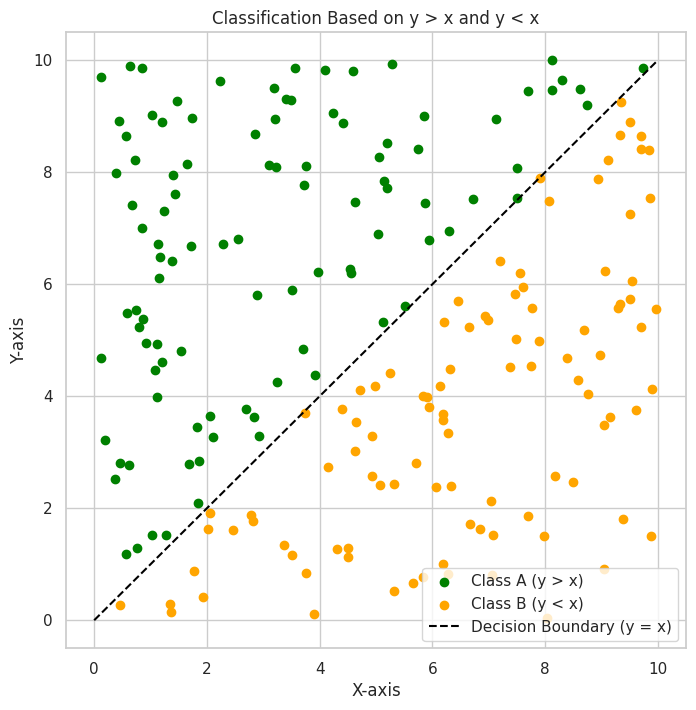

In [147]:
# Function to generate two classes based on the condition y > x and y < x
def generate_ab_class(n_points=100):
    class_A = []  # Class A: points where y > x
    class_B = []  # Class B: points where y < x
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 10)  # Random x in [0, 10]
        y = np.random.uniform(0, 10)  # Random y in [0, 10]
        if y > x and len(class_A) < n_points:
            class_A.append([x, y])
        elif y < x and len(class_B) < n_points:
            class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

# Generate the points for both classes
class_A, class_B = generate_ab_class()

# Plot the points and the decision boundary y = x
plt.figure(figsize=(8, 8))
plt.scatter(class_A[:, 0], class_A[:, 1], color='green', label='Class A (y > x)')
plt.scatter(class_B[:, 0], class_B[:, 1], color='orange', label='Class B (y < x)')
plt.plot([0, 10], [0, 10], color='black', linestyle='--', label='Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classification Based on y > x and y < x')
plt.legend()
plt.grid(True)
plt.show()

## Non-Linearly Separable Data (XOR Problem)

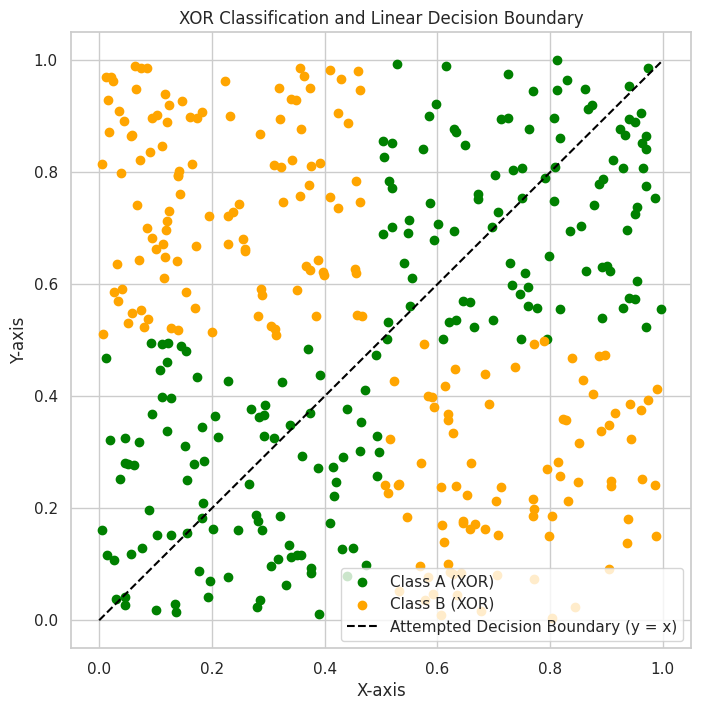

In [148]:
# Function to generate XOR problem data (not linearly separable)
def generate_xor_data(n_points=200, seed=42):
    np.random.seed(seed)
    class_A = []  # Class A: points in same quadrants (top-right or bottom-left)
    class_B = []  # Class B: points in opposite quadrants (top-left or bottom-right)
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 1)  # Random x in [0, 1]
        y = np.random.uniform(0, 1)  # Random y in [0, 1]
        # XOR condition:
        if (x > 0.5 and y > 0.5) or (x < 0.5 and y < 0.5):  # same side of threshold
            if len(class_A) < n_points:
                class_A.append([x, y])
        else:  # opposite sides of threshold
            if len(class_B) < n_points:
                class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

# Generate XOR data
class_A_xor, class_B_xor = generate_xor_data()

# Plot XOR data with an attempted linear decision boundary (y = x)
plt.figure(figsize=(8, 8))
plt.scatter(class_A_xor[:, 0], class_A_xor[:, 1], color='green', label='Class A (XOR)')
plt.scatter(class_B_xor[:, 0], class_B_xor[:, 1], color='orange', label='Class B (XOR)')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Attempted Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('XOR Classification and Linear Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

## Non-Linearly Separable Data (Circular data points)

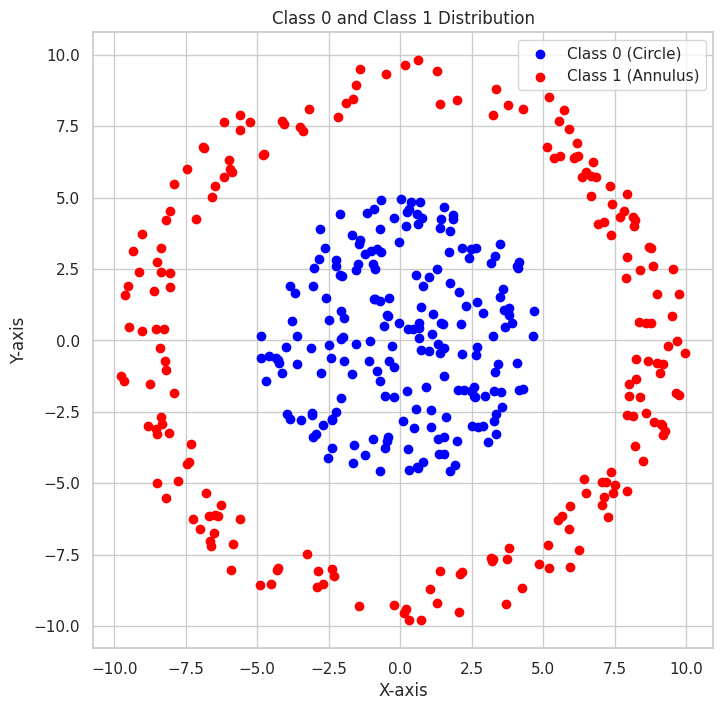

In [149]:
# Function to generate two classes of 2D points:
# - Class 0: points within a circle (radius 5)
# - Class 1: points in a ring/annulus (radius between 8 and 10)
def generate_data(n_points=200, seed=42):
    np.random.seed(seed)  # Set seed for reproducibility

    # Class 0: Points inside a circle of radius 5
    radius_0 = 5
    theta_0 = np.random.uniform(0, 2 * np.pi, n_points)  # Random angles [0, 2π]
    r_0 = radius_0 * np.sqrt(np.random.uniform(0, 1, n_points))  # Uniform distribution over circle area
    x0 = r_0 * np.cos(theta_0)  # Convert polar to Cartesian (x-coordinates)
    y0 = r_0 * np.sin(theta_0)  # Convert polar to Cartesian (y-coordinates)
    class_0 = np.vstack((x0, y0)).T  # Stack into a 2D array of shape (n_points, 2)

    # Class 1: Points in an annulus (ring) between radii 8 and 10
    inner_radius_1 = 8
    outer_radius_1 = 10
    theta_1 = np.random.uniform(0, 2 * np.pi, n_points)  # Random angles [0, 2π]
    # Radius values uniformly sampled from the area of the annulus
    r_1 = np.sqrt(np.random.uniform(inner_radius_1**2, outer_radius_1**2, n_points))
    x1 = r_1 * np.cos(theta_1)  # Convert to x-coordinates
    y1 = r_1 * np.sin(theta_1)  # Convert to y-coordinates
    class_1 = np.vstack((x1, y1)).T  # Stack into shape (n_points, 2)

    return class_0, class_1  # Return both classes as numpy arrays

# Generate the dataset
class_0, class_1 = generate_data()

# Plot the generated points
plt.figure(figsize=(8, 8))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0 (Circle)')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1 (Annulus)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Class 0 and Class 1 Distribution')
plt.legend()
plt.axis('equal')  # Keep aspect ratio 1:1
plt.grid(True)
plt.show()

# Perceptron Classifier from scratch

In this section, we will implement a perceptron classifier from scratch.

In [150]:
class Percep:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.errors_ = []  # Track number of misclassifications per epoch

    def fit(self, X, y):
        """
        Train the Perceptron model on the training data.

        Parameters:
        - X: array-like, shape = [n_samples, n_features]
          Input features.
        - y: array-like, shape = [n_samples]
          Target labels: +1 or -1.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zero
        self.bias = 0.0  # Initialize bias to zero

        for epoch in range(self.n_epochs):
            errors = 0
            for idx in range(n_samples):
                # Calculate linear output (dot product + bias)
                linear_output = np.dot(X[idx], self.weights) + self.bias
                y_pred = self._unit_step(linear_output)

                # If misclassified, update weights and bias
                if y[idx] != y_pred:
                    update = self.learning_rate * y[idx]
                    self.weights += update * X[idx]
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)

            # Stop early if no misclassifications
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break

    def predict(self, X):
        """
        Predict class labels using the learned weights.

        Parameters:
        - X: array-like, shape = [n_samples, n_features]

        Returns:
        - Array of predicted labels (+1 or -1)
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)

    def _unit_step(self, x):
        # Unit step function: returns 1 if x >= 0, else -1
        return np.where(x >= 0, 1, -1)

Prepare Dataset (Combine Classes A and B from Previous Cells)

In [151]:
# Stack data from class_A and class_B
X_ab = np.vstack((class_A, class_B))

# Create labels: +1 for class A, -1 for class B
y_ab = np.hstack((np.ones(class_A.shape[0]), -np.ones(class_B.shape[0])))

# Shuffle the data and labels together to avoid ordered data
shuffle_idx = np.random.permutation(len(X_ab))
X_ab, y_ab = X_ab[shuffle_idx], y_ab[shuffle_idx]

# Display sample data and labels
print("Combined Data Sample Points:\n", X_ab[:5])
print("Combined Labels:\n", y_ab[:5])

Combined Data Sample Points:
 [[0.43159912 8.91143114]
 [5.74473113 8.41828777]
 [9.38340457 1.81233066]
 [1.12038902 3.97855599]
 [5.20163501 8.521815  ]]
Combined Labels:
 [ 1.  1. -1.  1.  1.]


Train the Perceptron

In [152]:
# Create an instance of Perceptron with learning rate and max epochs
percept = Percep(learning_rate=0.01, n_epochs=1000)

# Train the perceptron model on the dataset
percept.fit(X_ab, y_ab)

# Display the final weights and bias
print(f"Final Weights: {percept.weights}")
print(f"Final Bias: {percept.bias}")

Converged after 8 epochs
Final Weights: [-0.43518699  0.43607194]
Final Bias: -0.01


Visualize the Decision Boundary and Decision Regions

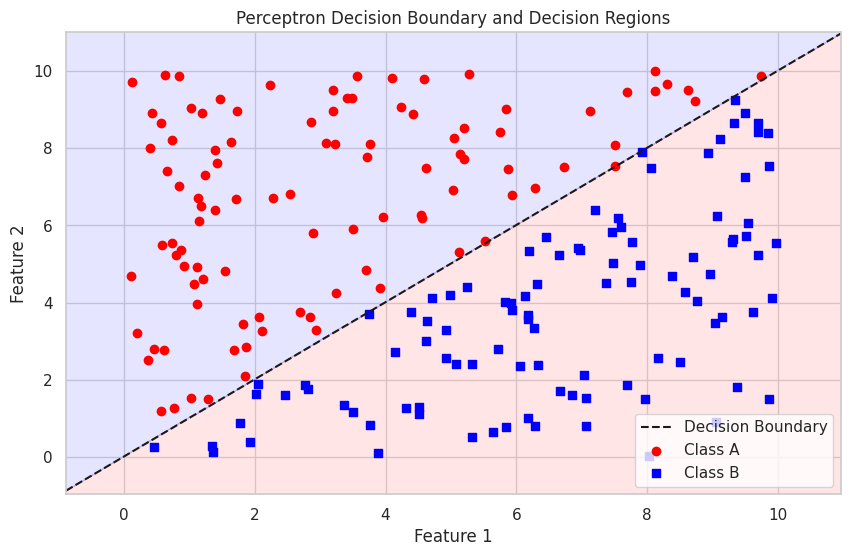

In [153]:
from matplotlib.colors import ListedColormap

# Define range of the plot
x_min, x_max = X_ab[:, 0].min() - 1, X_ab[:, 0].max() + 1
y_min, y_max = X_ab[:, 1].min() - 1, X_ab[:, 1].max() + 1

# Create a grid of points to classify
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]  # Flatten meshgrid into (n_samples, 2)
Z = percept.predict(grid)          # Predict each point in the grid
Z = Z.reshape(xx.shape)               # Reshape prediction for contour plot

# Define color maps for background and points
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Light red/blue for regions
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # Bold red/blue for points

plt.figure(figsize=(10, 6))

# Fill background with decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Draw decision boundary (line where prediction = 0)
if percept.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(percept.weights[0] * x_vals + percept.bias) / percept.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    # Vertical decision boundary if weight for y is zero
    x_val = -percept.bias / percept.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

# Plot original data points
plt.scatter(class_A[:, 0], class_A[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', marker='s', label='Class B')

# Axis and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()

#Imbalanced Data

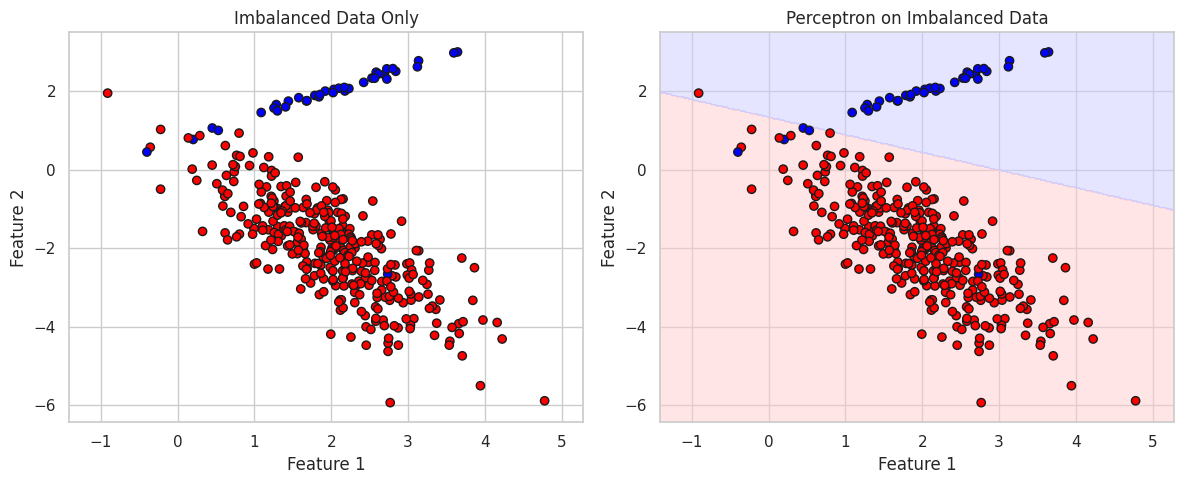

In [154]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generate a synthetic 2D binary classification dataset with class imbalance (90% vs 10%)
X, y = make_classification(
    n_classes=2,            # Binary classification
    class_sep=2,            # Distance between classes (for separability)
    weights=[0.9, 0.1],     # Class imbalance (90% class 0, 10% class 1)
    n_informative=2,        # Number of informative features
    n_redundant=0,          # No redundant features
    n_features=2,           # Only 2 features for easy visualization
    n_clusters_per_class=1,
    n_samples=500,
    random_state=42
)

# Split into training and test sets, maintaining class ratio (stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Initialize and train a Perceptron on imbalanced data
clf = Perceptron()
clf.fit(X_train, y_train)

# Function to plot the decision boundary of a classifier
def plot_decision_boundary(ax, X, y, model=None, title=""):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    if model is not None:
        # Predict class label for each point on the grid
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        # Show regions based on prediction
        ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFCCCC', '#CCCCFF']), alpha=0.5)

    # Plot training data
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k')
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Plot the raw imbalanced data and the decision boundary learned by Perceptron
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Left: original data only
plot_decision_boundary(axs[0], X_train, y_train, model=None, title="Imbalanced Data Only")

# Right: decision boundary learned on imbalanced data
plot_decision_boundary(axs[1], X_train, y_train, model=clf, title="Perceptron on Imbalanced Data")

plt.tight_layout()
plt.show()

##Oversampling(SMOTE)

Apply SMOTE (Synthetic Minority Oversampling Technique):

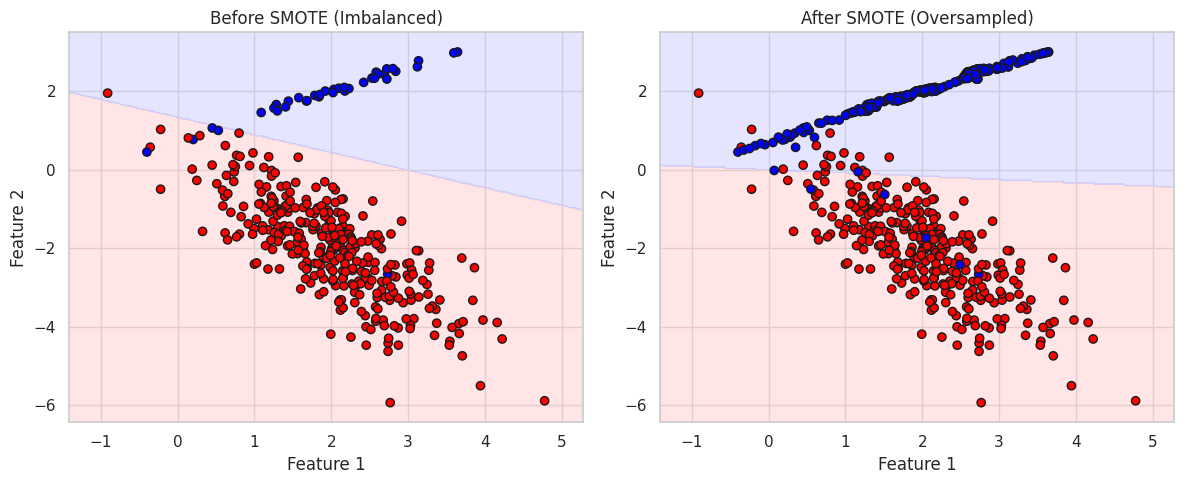

In [155]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a new Perceptron on the resampled (balanced) data
clf_smote = Perceptron()
clf_smote.fit(X_resampled, y_resampled)

# Plot decision boundaries before and after SMOTE
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(axs[0], X_train, y_train, model=clf, title="Before SMOTE (Imbalanced)")
plot_decision_boundary(axs[1], X_resampled, y_resampled, model=clf_smote, title="After SMOTE (Oversampled)")

plt.tight_layout()
plt.show()

##Undersampling

Apply Random Undersampling:

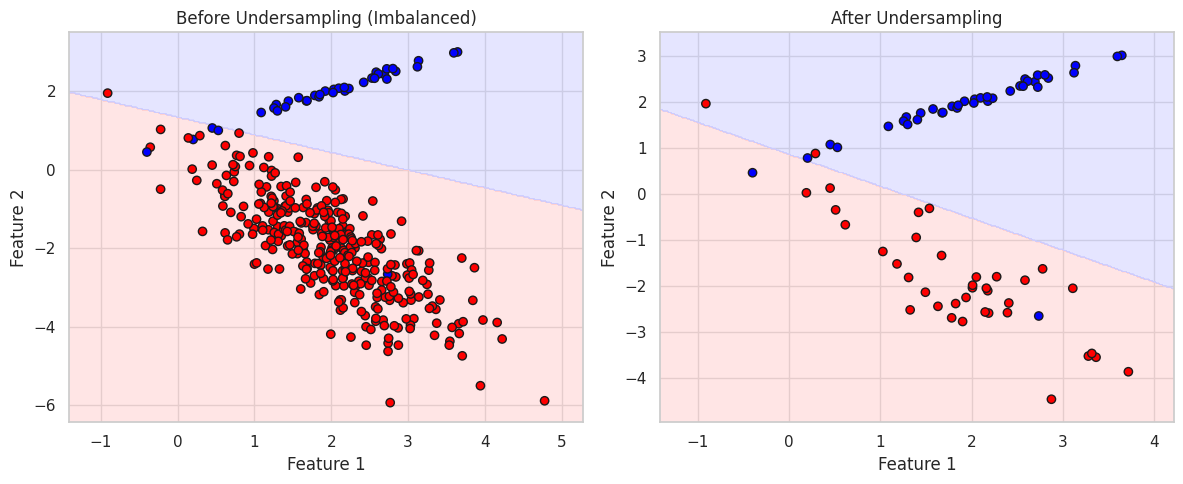

In [156]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to reduce the majority class
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train, y_train)

# Train a new Perceptron on the undersampled (balanced) data
clf_under = Perceptron()
clf_under.fit(X_under, y_under)

# Plot decision boundaries before and after undersampling
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(axs[0], X_train, y_train, model=clf, title="Before Undersampling (Imbalanced)")
plot_decision_boundary(axs[1], X_under, y_under, model=clf_under, title="After Undersampling")

plt.tight_layout()
plt.show()

# Real-World Example: Breast Cancer

Let us visit the breast cancer dataset again:
   - Select two features `mean radius` and `mean texture` for visualization purposes.
   - Split the dataset into training and testing sets.

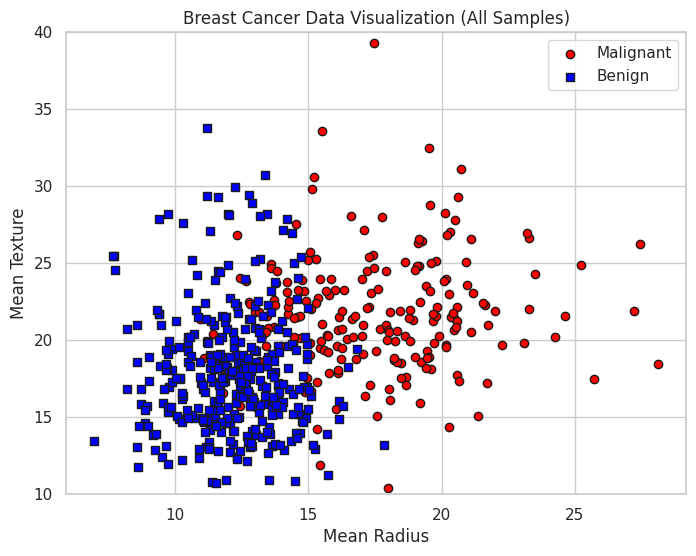

In [157]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load breast cancer dataset from scikit-learn
data = load_breast_cancer()
X = data.data
y = data.target  # Labels: 0 = malignant, 1 = benign

# Convert to pandas DataFrame for easy handling
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Select two features for visualization and classification
selected_features = ['mean radius', 'mean texture']
X_selected = df[selected_features].values
y_selected = y  # Use full target array

# Scatter plot of the selected features
plt.figure(figsize=(8, 6))

# Class 0: Malignant (red)
plt.scatter(X_selected[y_selected == 0, 0], X_selected[y_selected == 0, 1],
            color='red', marker='o', edgecolor='k', label='Malignant')

# Class 1: Benign (blue)
plt.scatter(X_selected[y_selected == 1, 0], X_selected[y_selected == 1, 1],
            color='blue', marker='s', edgecolor='k', label='Benign')

# Plot styling
plt.ylim(10, 40)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer Data Visualization (All Samples)')
plt.legend()
plt.grid(True)
plt.show()

Split data to 80% train and 20% test:

In [158]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test), maintaining class distribution (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 455
Testing samples: 114


Train Perceptron on the Training Set:

In [159]:
# Convert class labels to Perceptron-friendly format: 0 -> -1, 1 -> +1
y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)

# Initialize and train a custom Perceptron (your own implementation)
percept = Percep(learning_rate=0.01, n_epochs=1000)
percept.fit(X_train, y_train_perceptron)

# Display final learned weights and bias
print(f"Final Weights: {percept.weights}")
print(f"Final Bias: {percept.bias}")

Final Weights: [-1.63173 -0.3517 ]
Final Bias: 30.740000000002006


As you remember, samples are not linearly separable. We can expect number of misclassifications not to converge to 0:

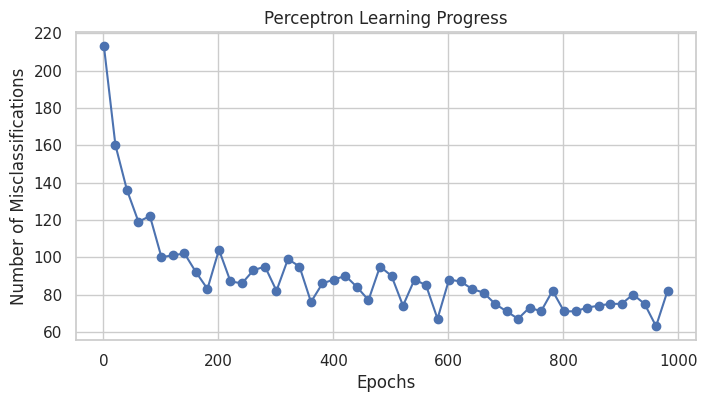

In [160]:
# Plot number of misclassified samples every 20 epochs
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(percept.errors_) + 1, 20), percept.errors_[::20], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

Plot Perceptron Decision Boundary on Test Set:

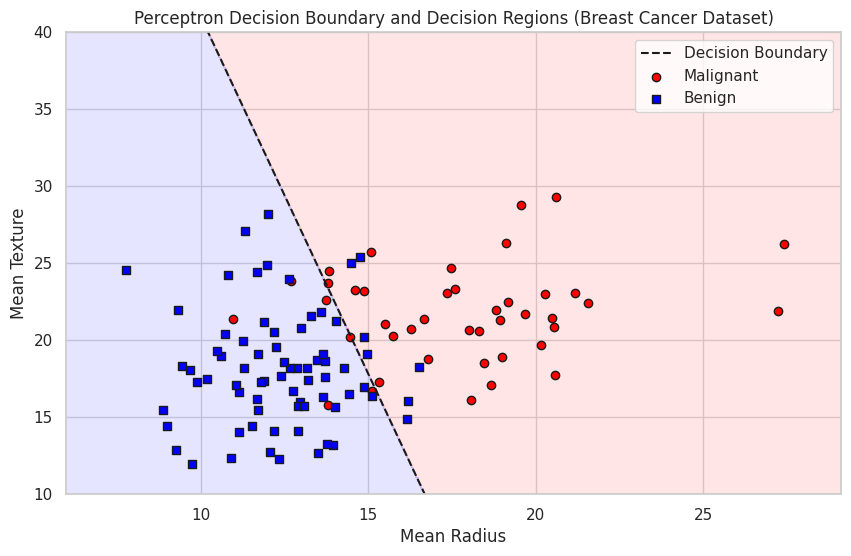

In [161]:
# Create a mesh grid for plotting decision regions
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict labels for each point on the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = percept.predict(grid)
Z = Z.reshape(xx.shape)

# Define color maps for regions and class markers
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Background colors
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # Point colors

plt.figure(figsize=(10, 6))

# Draw decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Draw decision boundary as a dashed line
if percept.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(percept.weights[0] * x_vals + percept.bias) / percept.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -percept.bias / percept.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

# Plot test data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            color='red', marker='o', edgecolor='k', label='Malignant')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color='blue', marker='s', edgecolor='k', label='Benign')

plt.ylim(10, 40)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Perceptron Decision Boundary and Decision Regions (Breast Cancer Dataset)')
plt.legend()
plt.grid(True)
plt.show()